In [1]:
import os
import ast
import h5py
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
input_file = "data/combined_data4.geojson"
## Read combined data
combined_gdf = gpd.read_file(input_file)

In [3]:
print(combined_gdf.head())
print(combined_gdf.crs)
print(combined_gdf.columns.to_list())
combined_gdf.crs = "EPSG:25832"
print(combined_gdf.crs)
print(combined_gdf.shape)

                     id                                                B11  \
0  00000000000000001a6a  [ [ 0.28049999475479126, 0.28049999475479126, ...   
1  00000000000000001a6b  [ [ 0.2807999849319458, 0.2807999849319458, 0....   
2  00000000000000001a6c  [ [ 0.29300001263618469, 0.29969999194145203, ...   
3  00000000000000001a6d  [ [ 0.29730001091957092, 0.30210000276565552, ...   
4  00000000000000001a6e  [ [ 0.3059999942779541, 0.3059999942779541, 0....   

                                               B11_1  \
0  [ [ 0.30849999189376831, 0.30849999189376831, ...   
1  [ [ 0.21970000863075256, 0.21970000863075256, ...   
2  [ [ 0.31360000371932983, 0.31650000810623169, ...   
3  [ [ 0.32719999551773071, 0.31650000810623169, ...   
4  [ [ 0.33559998869895935, 0.33559998869895935, ...   

                                               B11_2  \
0  [ [ 0.26954999566078186, 0.26954999566078186, ...   
1  [ [ 0.26690000295639038, 0.26690000295639038, ...   
2  [ [ 0.26550000905990601

In [4]:
depot = combined_gdf

In [5]:

# for now, we just select the NDVI, and keep id&species
select_col = ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species']
select_col_ = ['l1_leaf_types', 'l2_genus','l3_species', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7']

select_df = combined_gdf[select_col]

nullds = select_df.isnull().sum()
print(nullds)

id                  0
B11                 0
B11_1               0
B11_2               0
B11_3               0
                 ... 
SAVI_6              9
SAVI_7           1942
l1_leaf_types       0
l2_genus            0
l3_species          0
Length: 124, dtype: int64


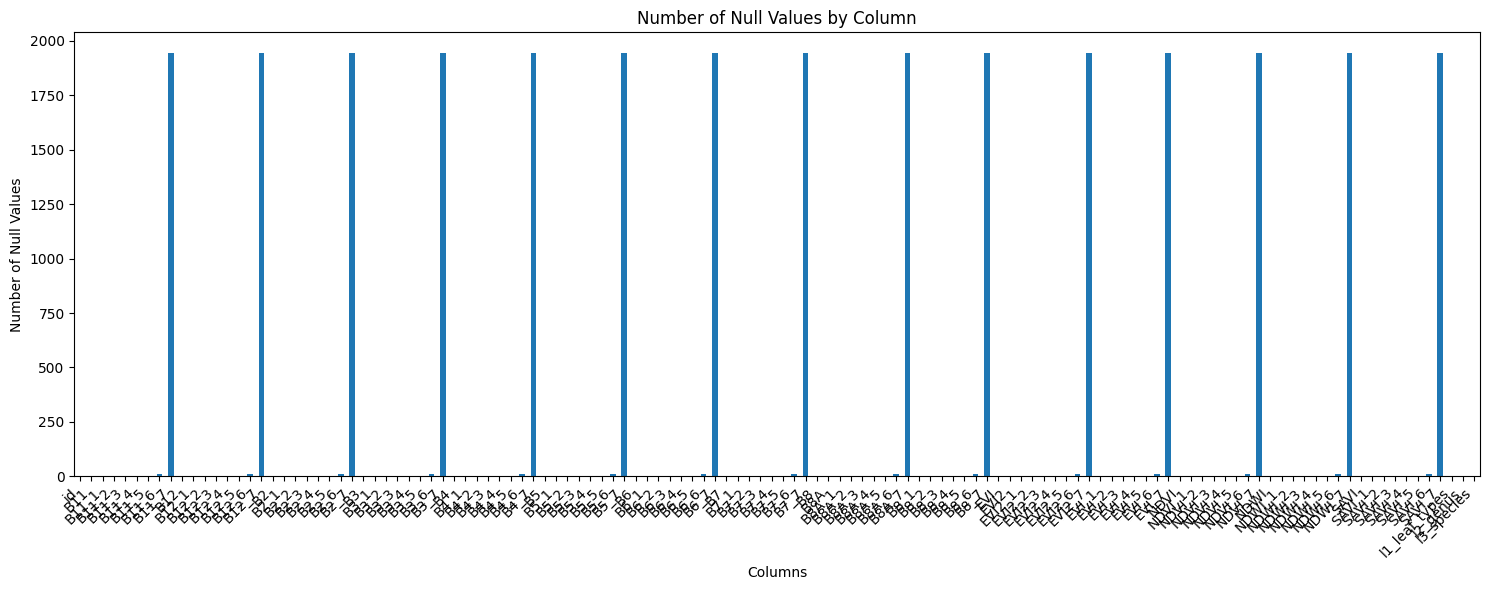

In [6]:
plt.figure(figsize=(15, 6))
nullds[nullds >= 0].plot(kind='bar')
plt.title('Number of Null Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

The graph a bove shows some columns still lacking data after interpolation in GEE. However since it is not the whole dataset we can just drop the na values.

In [7]:
# drop rows containing null values
select_df = select_df.dropna()

# drop rows containing 'none' (in any case) in any column
select_df = select_df[~select_df.apply(lambda row: row.astype(str).str.lower().eq('none').any(), axis=1)]

nullds = select_df.isnull().sum()
print(nullds)


id               0
B11              0
B11_1            0
B11_2            0
B11_3            0
                ..
SAVI_6           0
SAVI_7           0
l1_leaf_types    0
l2_genus         0
l3_species       0
Length: 124, dtype: int64


In [8]:
# load the labels
labels = np.array(select_df[['l1_leaf_types', 'l2_genus','l3_species']])
sen2 = np.array(select_df[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']])
# show the shape
print("Labels shape: " + str(labels.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels[:])
print(sen2[:])
print(sen2.shape)

Labels shape: (35965, 3)
[['broadleaf' 'long-lived deciduous' 'linden']
 ['broadleaf' 'long-lived deciduous' 'linden']
 ['broadleaf' 'long-lived deciduous' 'linden']
 ...
 ['broadleaf' 'short-lived deciduous' 'alder']
 ['broadleaf' 'short-lived deciduous' 'alder']
 ['broadleaf' 'short-lived deciduous' 'alder']]
[['[ [ 0.28049999475479126, 0.28049999475479126, 0.29100000858306885, 0.29100000858306885, 0.29100000858306885 ], [ 0.29429998993873596, 0.29429998993873596, 0.29330000281333923, 0.29330000281333923, 0.29330000281333923 ], [ 0.29429998993873596, 0.29429998993873596, 0.29330000281333923, 0.29330000281333923, 0.29330000281333923 ], [ 0.28009998798370361, 0.28009998798370361, 0.27129998803138733, 0.27129998803138733, 0.27129998803138733 ], [ 0.28009998798370361, 0.28009998798370361, 0.27129998803138733, 0.27129998803138733, 0.27129998803138733 ] ]'
  '[ [ 0.30849999189376831, 0.30849999189376831, 0.31549999117851257, 0.31549999117851257, 0.31549999117851257 ], [ 0.31130000948905945

We can one hot code the labels at this point. Later on when we augment the data we still can align the indices using the one hot coded labels.

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# load the labels
labels_l1 = np.array(select_df[['l1_leaf_types']])
labels_l2 = np.array(select_df[['l2_genus']])
labels_l3 = np.array(select_df[['l3_species']])


encoder = OneHotEncoder(sparse_output=False)
labels_l1 = encoder.fit_transform(labels_l1.reshape(-1, 1))
labels_l2 = encoder.fit_transform(labels_l2.reshape(-1, 1))
labels_l3 = encoder.fit_transform(labels_l3.reshape(-1, 1))
#print("Labels shape: " + str(labels.shape))
#print("\nFirst 19 rows:")


This cell below is simply parses sentinal from string array type values to float64 type array. However this also makes the sent 2 band dataset 4 dimensional (5x5). Below there is another code that is preserving flattened structure and still parses sen 2 data. The differnece is 4d data is sent to cnn or resnet while 2 d data is used in our random forest classifier.

In [75]:
def parse_sentinel_arrays(sen2):
    parsed_samples = []
    for i in range(sen2.shape[0]):
        # Each row → parse 120 columns into float arrays, each 5x5
        bands = []
        for j in range(sen2.shape[1]):
            arr_2d = np.array(ast.literal_eval(sen2[i, j]), dtype=np.float64)  # shape (5,5)
            bands.append(arr_2d)
        # Stack => shape (5,5,120)
        sample_3d = np.stack(bands, axis=-1)
        parsed_samples.append(sample_3d)
    return np.array(parsed_samples)  # shape (num_samples, 5, 5, 120)

# Example usage
X = parse_sentinel_arrays(sen2)
print(X.shape)          # Expect (26268, 5, 5, 120)
print(X[0, :, :, 0])    # Check one band of the first sample
print(X.dtype)          # Ensure float type

ValueError: malformed node or string: None

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

print("Initial shapes:")
print(f"labels_l1: {labels_l1.shape}")
print(f"labels_l2: {labels_l2.shape}")
print(f"labels_l3: {labels_l3.shape}")
print(f"sen2: {sen2.shape}")

print(labels_l1.dtype)
print(labels_l2.dtype)
print(labels_l3.dtype)
print(sen2.dtype)






Initial shapes:
labels_l1: (35965, 2)
labels_l2: (35965, 9)
labels_l3: (35965, 19)
sen2: (35965, 105)
float64
float64
float64
object


Here we check the inbalance of 3rd hierarcht labels. The catch here is some l2 genus labels have only one l3 tier classes and some have 3 or 4 classes. So imbalnace in l3 is reflected differently to l2 tier labels imbalance.

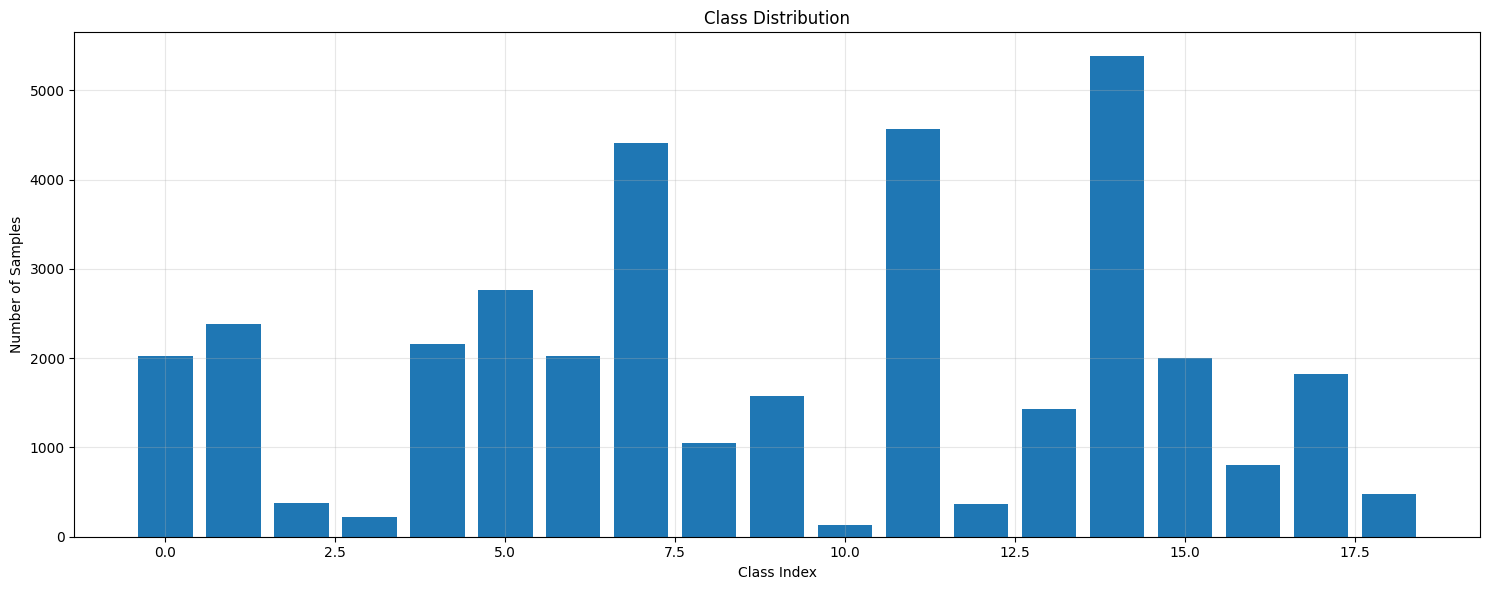

In [11]:
# Get the sum of each column (class counts)
class_sizes = np.sum(labels_l3, axis=0)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_sizes)), class_sizes)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')

# Adjust layout
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

In [12]:
# Convert string representation of arrays to actual numpy arrays
def convert_string_to_array(s):
	# Using ast.literal_eval to safely evaluate the string as a Python literal
	array_data = ast.literal_eval(s)
	return np.array(array_data)

# Convert all elements in sen2 to numpy arrays
sen2_arrays = np.array([convert_string_to_array(x) for x in sen2.flatten()])
number_samples = sen2.shape[0]
sen2_reshaped = sen2_arrays.reshape(number_samples, -1)

print("Post-processed Sentinel-2 data shape: ", sen2_reshaped.shape)

Post-processed Sentinel-2 data shape:  (35965, 2625)


Here the smote values are manually defined. However, these numbers are highly open to experimenting.

In [54]:
from imblearn.over_sampling import SMOTE

# Create a dictionary for multiple classes
sampling_strategy = {
    0: 5000,
    1: 5000,
    2: 5000,  
    3: 5000,
    4: 1000,  
    5: 1000,   
    6: 1000,
    7: 5000,
    8: 5000,
    9: 5000,
    10: 5000,
    11: 6200,
    12: 5000,
    13: 5000,
    14: 6200,
    15: 5000,
    16: 5000,
    17: 5000,
    18: 5000
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, l3_resampled = smote.fit_resample(sen2_reshaped, np.argmax(labels_l3, axis=1))


# Update the labels_l3 with the resampled data
labels_l3_resampled = encoder.fit_transform(l3_resampled.reshape(-1, 1))

Resampled shapes: (97400, 2625) (97400, 19)


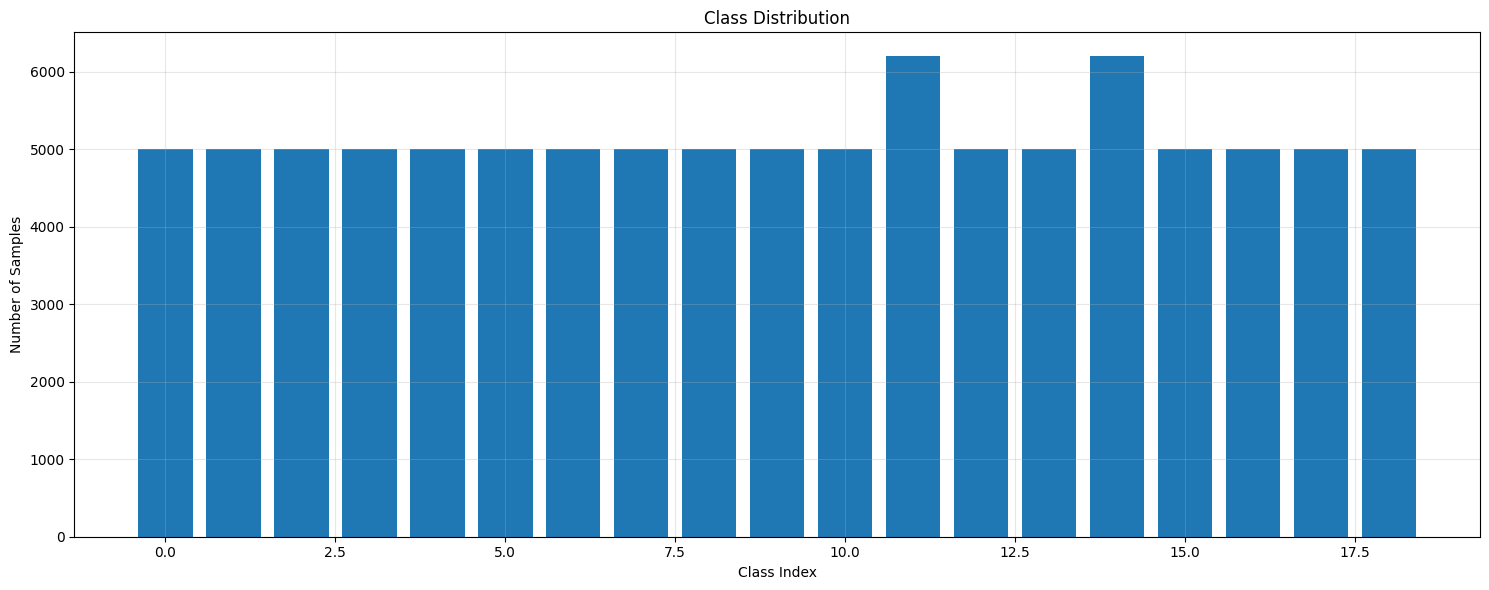

In [65]:
print("Resampled shapes:", X_resampled.shape, labels_l3_resampled.shape)

# Get the sum of each column (class counts)
class_sizes = np.sum(labels_l3_resampled, axis=0)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_sizes)), class_sizes)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')

# Adjust layout
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

In [91]:

print(labels_l3_resampled.shape)

(97400, 19)


This cell is taken from GEE just to see the hierarchy while label contraints are written below.

In [67]:
# 0 -> 0, 1 ,2, 3
  # 0 -> 0
  # 1 -> 1, 2, 3
  # 2 -> 4, 5, 6, 7
  # 3 -> 8, 9, 10
# 1 -> 4, 5, 6, 7, 8
  # 4 -> 11
  # 5 -> 12, 13
  # 6 -> 14
  # 7 -> 15, 16 ,17
  # 8 -> 18

# Example hierarchy
treeHierarchy = {
  'broadleaf': {
    'beech': ['european beech'],
    'oak': ['sessile oak', 'english oak', 'red oak'],
    'long-lived deciduous': ['sycamore maple', 'european ash', 'linden', 'cherry'],
    'short-lived deciduous': ['alder', 'poplar', 'birch']
  },
  'needleleaf': {
    'fir': ['silver fir'],
    'larch': ['european larch', 'japanese larch'],
    'spruce': ['norway spruce'],
    'pine': ['scots pine', 'black pine', 'weymouth pine'],
    'douglas fir': ['douglas fir']
  }
}


KeyError: Ellipsis

This cell is the crucial part. After l3 and sent 2 are smoted and fit and transformed together, labels l1 and labaels l2 are left behind still un-augmented. However, the sizes of dataset better be aligning perfectly and it takes only a manuel script to loop over augmented l3 labels, find out which specie is the new augmented specie is and then add dataset it's l1 and l2 labels as well. This way the dataset is complete.

Resampled shapes: (97400, 19)
Resampled shapes: (97400, 2) (97400, 9)


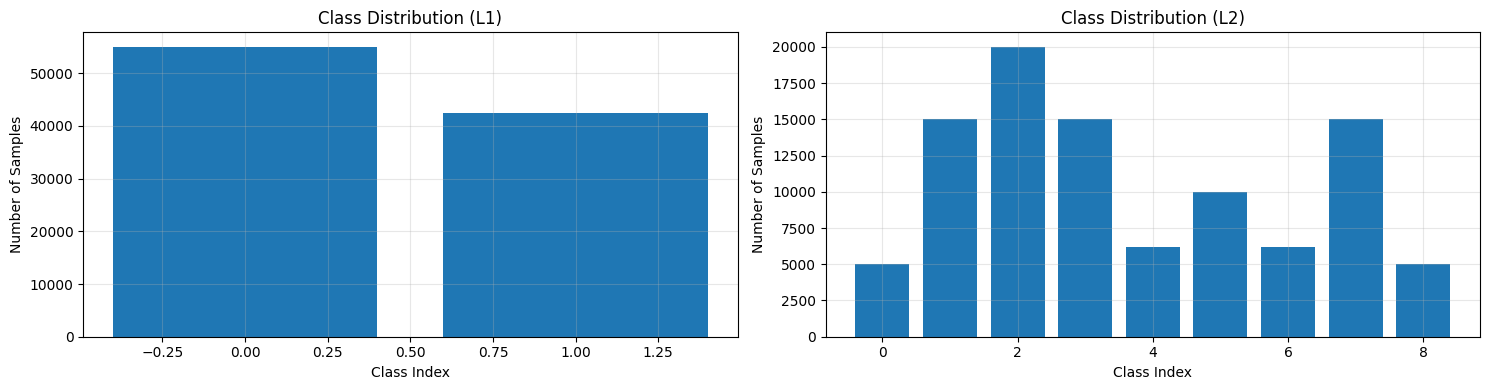

In [88]:
# 0 -> 0, 1 ,2, 3
  # 0 -> 0
  # 1 -> 1, 2, 3
  # 2 -> 4, 5, 6, 7
  # 3 -> 8, 9, 10
# 1 -> 4, 5, 6, 7, 8
  # 4 -> 11
  # 5 -> 12, 13
  # 6 -> 14
  # 7 -> 15, 16 ,17
  # 8 -> 18


l3_to_l2_l1 = {
    0: (0, 0),  # "european beech" -> beech -> broadleaf
    1: (1, 0),  # "sessile oak"    -> oak   -> broadleaf
    2: (1, 0),  # "english oak"    -> oak   -> broadleaf
    3: (1, 0),  # "red oak"        -> oak   -> broadleaf
    4: (2, 0),  # "sycamore maple" -> long-lived dec. -> broadleaf
    5: (2, 0),  # “european ash”   -> long-lived dec. -> broadleaf
    6: (2, 0),
    7: (2, 0),
    8: (3, 0),
    9: (3, 0),
    10: (3, 0),
    # ...
    11: (4, 1), # "silver birch"   -> birch -> broadleaf
    12: (5, 1),
    13: (5, 1),
    14: (6, 1), # "norway spruce"  -> spruce -> needleleaf
    15: (7, 1), # "scots pine"     -> pine   -> needleleaf
    16: (7, 1), # "black pine"     -> pine   -> needleleaf
    17: (7, 1), # "weymouth pine"  -> pine   -> needleleaf
    18: (8, 1)  # "douglas fir"    -> douglas fir -> needleleaf
}

# Initialize resampled labels with the same number of rows as labels_l3_resampled
num_samples = labels_l3_resampled.shape[0]
num_l1_classes = labels_l1.shape[1]
num_l2_classes = labels_l2.shape[1]

labels_l1_resampled = np.zeros((num_samples, num_l1_classes))
labels_l2_resampled = np.zeros((num_samples, num_l2_classes))


for i in range(len(labels_l3_resampled)):
    l3_onehot = labels_l3_resampled[i]
    l3_idx = np.argmax(l3_onehot)  # which species is 1
    (correct_l2_idx, correct_l1_idx) = l3_to_l2_l1[l3_idx]

    # Zero out and set the corrected one-hot for L2
    labels_l2_resampled[i, :] = 0
    labels_l2_resampled[i, correct_l2_idx] = 1
    
    # Zero out and set the corrected one-hot for L1
    labels_l1_resampled[i, :] = 0
    labels_l1_resampled[i, correct_l1_idx] = 1

print("Resampled shapes:", labels_l3_resampled.shape)
print("Resampled shapes:", labels_l1_resampled.shape, labels_l2_resampled.shape)
# Get the sum of each column (class counts)
plt.figure(figsize=(15, 4))

# Plot for labels_l1_resampled
plt.subplot(1, 2, 1)
class_sizes_l1 = np.sum(labels_l1_resampled, axis=0)
plt.bar(range(len(class_sizes_l1)), class_sizes_l1)
plt.title('Class Distribution (L1)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

# Plot for labels_l2_resampled
plt.subplot(1, 2, 2)
class_sizes_l2 = np.sum(labels_l2_resampled, axis=0)
plt.bar(range(len(class_sizes_l2)), class_sizes_l2)
plt.title('Class Distribution (L2)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

plt.tight_layout()

0 -> 0

1 -> 1, 2, 3

2 -> 4, 5, 6, 7

3 -> 8, 9, 10

4 -> 11

5 -> 12, 13

6 -> 14

7 -> 15, 16 ,17

8 -> 18

After l1 and l2 labels are assigned, the question is how this inbalance in labels l2 effect training. The fact is that the inbalance only happens because l2 classes have different number of l3 species. Some have 1 and some include 4 specie types. Maybe it is better to keep it imbalanced or maybe not is decided to be answered with experimental approach. Using class weights in cnn is possible going to address this problem at some level.

In [90]:
# These variables are already properly assigned in previous cells.
# We'll just verify the shapes here for correctness:
print("X_resampled:", X_resampled.shape)
print("labels_l1_resampled:", labels_l1_resampled.shape)
print("labels_l2_resampled:", labels_l2_resampled.shape)
print("labels_l3_resampled:", labels_l3_resampled.shape)
# Verify that the concatenated dataset maintains the correct entities in rows
# We will check a few random samples to ensure that the labels and features match

# Select random indices to check
random_indices = np.random.choice(X_resampled.shape[0], size=5, replace=False)

for idx in random_indices:
    print(f"Index: {idx}")
    print(f"Features: {X_resampled[idx]}")
    print(f"L1 Label: {labels_l1_resampled[idx]}")
    print(f"L2 Label: {labels_l2_resampled[idx]}")
    print(f"L3 Label: {labels_l3_resampled[idx]}")
    print("\n")

X_resampled: (97400, 2625)
labels_l1_resampled: (97400, 2)
labels_l2_resampled: (97400, 9)
labels_l3_resampled: (97400, 19)
Index: 27830
Features: [0.2728     0.2728     0.2728     ... 0.38937117 0.39513512 0.36184115]
L1 Label: [1. 0.]
L2 Label: [0. 0. 0. 1. 0. 0. 0. 0. 0.]
L3 Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Index: 34927
Features: [0.3066     0.3066     0.29859999 ... 0.36654311 0.37020223 0.37020223]
L1 Label: [1. 0.]
L2 Label: [1. 0. 0. 0. 0. 0. 0. 0. 0.]
L3 Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Index: 21563
Features: [0.31979999 0.34740001 0.34740001 ... 0.36860999 0.36860999 0.40763217]
L1 Label: [0. 1.]
L2 Label: [0. 0. 0. 0. 1. 0. 0. 0. 0.]
L3 Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Index: 55682
Features: [0.28750665 0.28876423 0.28748906 ... 0.47157012 0.47157012 0.46700564]
L1 Label: [1. 0.]
L2 Label: [0. 0. 1. 0. 0. 0. 0. 0. 0.]
L3 Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.